In [1]:
import torch
import numpy

import matplotlib.pyplot as plt

plt.style.use('default')

'''
0: 加权蒸馏 0.880
1: 逐个蒸馏 0.850
2: 服务器交换参数 0.825
3: 服务器单独训练, 不使用公开数据 0.881
4: 服务器单独训练，使用公开数据 0.872
'''

file_path = './res/cifar10_model_1_algo_0/alpha_0.5_T_6/server_commu_2_client_commu_2_client_train_2_batch_size_160_num_all_client_9_num_all_server_3_num_client_data_1200_num_public_data_50_proportion_0.8.pt'
data = torch.load(file_path, map_location='cpu')

print(data.keys())

dict_keys(['args', 'server_acc', 'client_acc', 'train_acc', 'client_loss'])


0.10010050237178802 [0.10010050237178802, 0.10010050237178802, 0.10010050237178802, 0.10010050237178802]


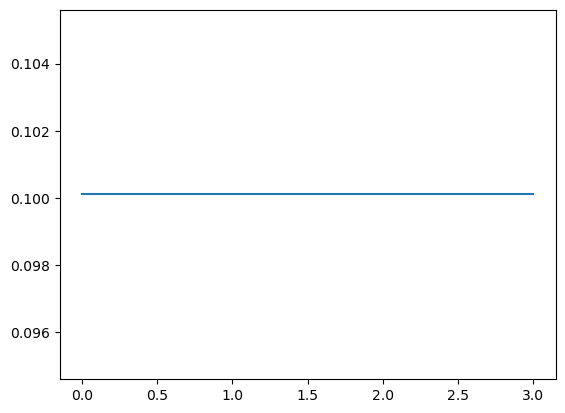

In [2]:
server_acc = data['server_acc']
num_line = len(server_acc[0])
x = numpy.arange(num_line)
i = 2
y = numpy.array(server_acc[i])
plt.plot(x, y)
print(y[-1], list(y))
plt.show()

0.09989949315786362 [0.09989949315786362, 0.09989949315786362, 0.09989949315786362, 0.09989949315786362, 0.09989949315786362, 0.09989949315786362, 0.09989949315786362, 0.09989949315786362, 0.09989949315786362, 0.09989949315786362, 0.09989949315786362, 0.09989949315786362]


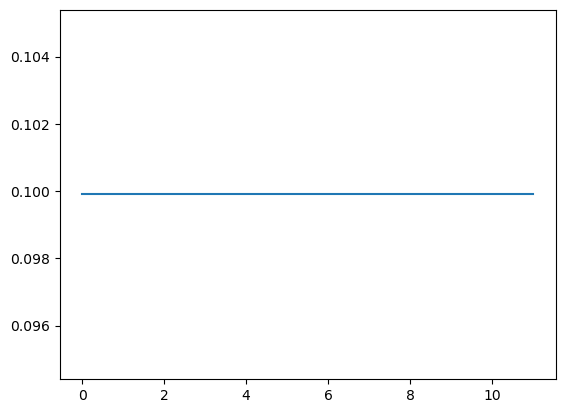

In [3]:
client_acc = data['client_acc']
# print(len(client_acc[0]))
num_line = len(client_acc[0])
x = numpy.arange(num_line)
i = 1
y = numpy.array(client_acc[i])
plt.plot(x, y)
print(y[-1], list(y))
plt.show()

1.5390571355819702 [2.2234315872192383, 2.1911325454711914, 2.1517891883850098, 2.1251132488250732, 2.0670199394226074, 2.0134992599487305, 1.934783935546875, 1.8707923889160156, 1.7928375005722046, 1.7039085626602173, 1.5878427028656006, 1.4971760511398315, 1.33614182472229, 1.5487103462219238, 1.2713466882705688, 1.0671120882034302, 1.0248198509216309, 0.9211289286613464, 0.8835909962654114, 0.9201029539108276, 1.1037876605987549, 0.916217029094696, 0.8754650950431824, 0.8862289190292358, 1.029861330986023, 1.2098745107650757, 0.8397468328475952, 0.9051755666732788, 0.8363651037216187, 0.9426740407943726, 1.0066745281219482, 0.8470771908760071, 1.0782874822616577, 0.936191201210022, 0.6893938183784485, 0.9495922923088074, 0.8919385075569153, 0.8889848589897156, 0.9867120981216431, 0.7769777774810791, 1.132921814918518, 0.4829918444156647, 1.683735966682434, 1.623750925064087, 0.7827275991439819, 0.9861052632331848, 0.9674914479255676, 0.9392746090888977, 0.9652284383773804, 0.8459326

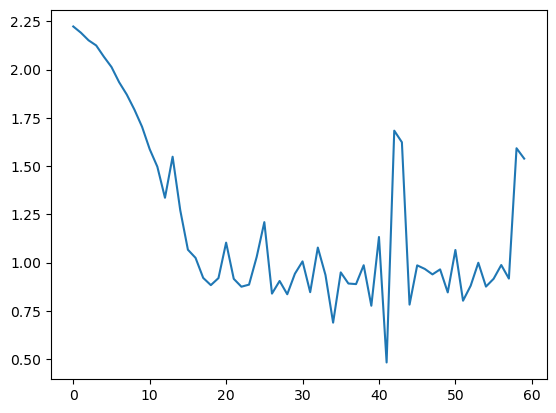

In [4]:
client_loss = data['client_loss']
num_line = len(client_loss[0])
x = numpy.arange(num_line)
i = 0
y = numpy.array(client_loss[i])
plt.plot(x, y)
print(y[-1], list(y))
plt.show()

0.7799999713897705 [0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705]


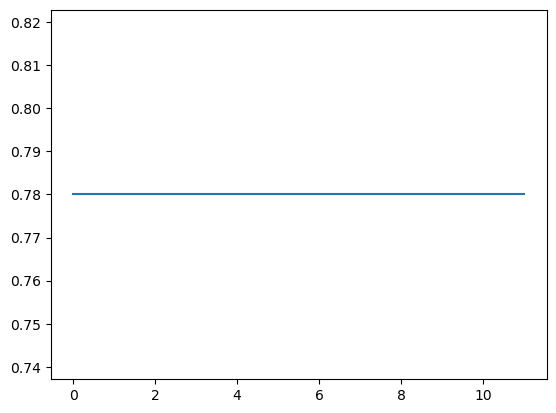

In [5]:
train_acc = data['train_acc']
num_line = len(train_acc[0])
x = numpy.arange(num_line)
i = 0
y = numpy.array(train_acc[i])
plt.plot(x, y)
print(y[-1], list(y))
plt.show()